In [2]:
import pandas as pd
import numpy as np
import scipy.stats as stats

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from functions.load_data import *
from functions.clean_data import *

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
df = load_diabetes_data()
df_clean = clean_feature_data(df)

# Hypthosis Testing

In [7]:
# Create a contingency table for diabetes and race
contingency_table = pd.crosstab(df_clean['diabetes'], df_clean['non_hispanic_race'])

print("Contingency Table:")
print(contingency_table)

# Perform Chi-square test of independence
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# Output the results
print(f"Chi-Square Statistic: {chi2:.2f}")
print(f"p-value: {p:.2e}")

# Interpretation
alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis. There is a difference between races in terms of diabetes rates.")
else:
    print("Fail to reject the null hypothesis. There is no difference between races in terms of diabetes rates.")


Contingency Table:
non_hispanic_race  Asian Indian  Black/African American  Chinese  Filipino  \
diabetes                                                                     
NO                          314                    3176      311       357   
YES                          21                     547       14        44   

non_hispanic_race  Indian (American), Alaska Native  \
diabetes                                              
NO                                              355   
YES                                              73   

non_hispanic_race  Multiple race, no primary race selected  Other Asian  \
diabetes                                                                  
NO                                                      98          551   
YES                                                      5           50   

non_hispanic_race  Primary race not releasable  White  
diabetes                                               
NO                                

equitably analyze what races are more affected/susceptible to diabetes emergence

# Linear Regression

# diabetes

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

df_linear = df_clean[['non_hispanic_race', 'diabetes']]

# One-hot encode the race column (create columns for each race with 0 or 1 values)
df_linear = pd.get_dummies(df_linear, columns=['non_hispanic_race'], #drop_first=True
                          )
df_linear.drop(columns=['non_hispanic_race_White'], inplace=True)
# Define the independent (predictor) variables: race columns
X = df_linear.filter(like='non_hispanic_race_')  # Select all the race dummy variables

# Define the dependent variable (target): diabetes (encoded as 0 = No, 1 = Yes)
y = df_linear['diabetes'].apply(lambda x: 1 if x == 'YES' else 0)

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Get the intercept and coefficients
intercept = model.intercept_
coefficients = model.coef_

dict_diabetes = {}

# Output the coefficients for each race
print(f"Intercept:{intercept: .4f}")
for race, coef in zip(X.columns, coefficients):
    print(f"Coefficient for {race}: {coef:.2f}")

    dict_diabetes[race] = [coef]

Intercept: 0.1024
Coefficient for non_hispanic_race_Asian Indian: -0.04
Coefficient for non_hispanic_race_Black/African American: 0.04
Coefficient for non_hispanic_race_Chinese: -0.06
Coefficient for non_hispanic_race_Filipino: 0.01
Coefficient for non_hispanic_race_Indian (American), Alaska Native: 0.07
Coefficient for non_hispanic_race_Multiple race, no primary race selected: -0.05
Coefficient for non_hispanic_race_Other Asian: -0.02
Coefficient for non_hispanic_race_Primary race not releasable: 0.04


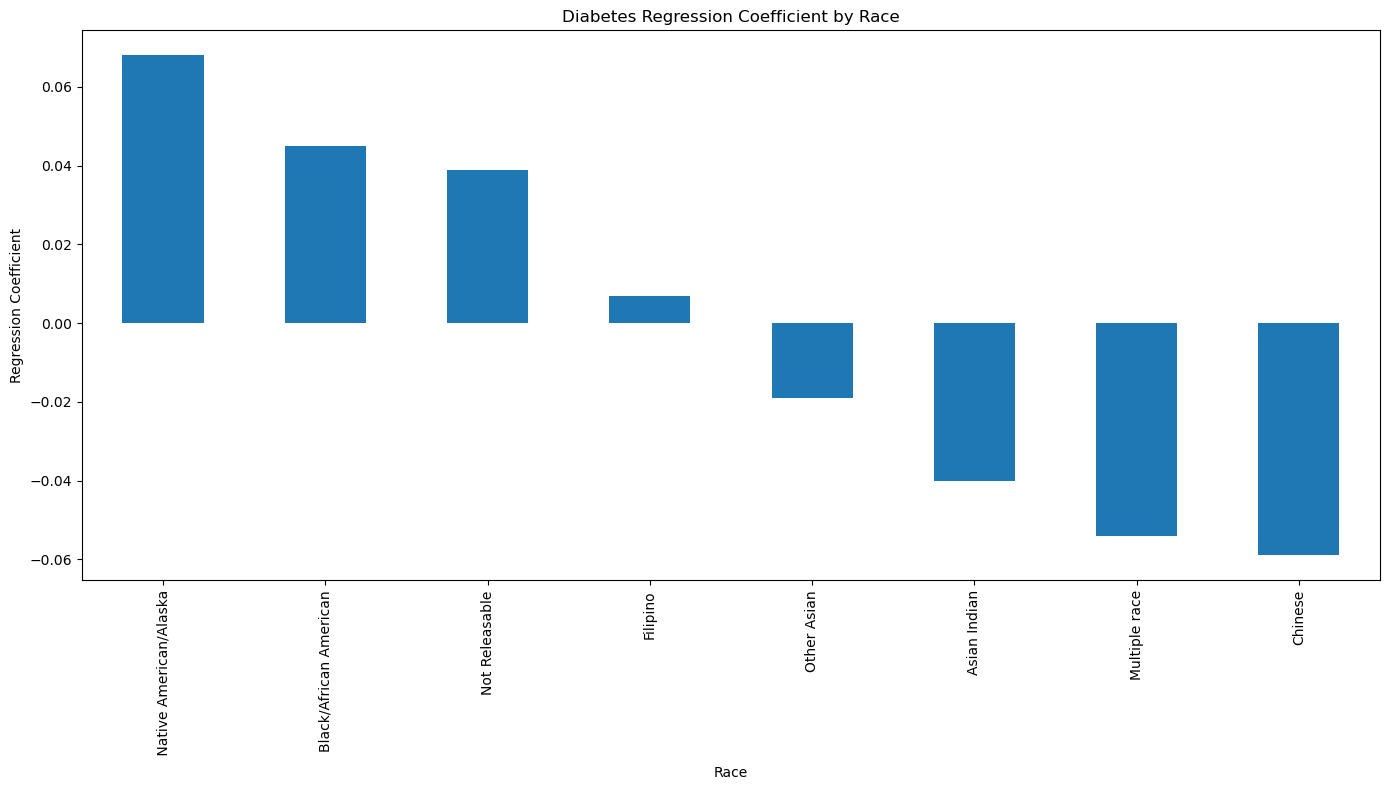

In [12]:
df_dia_reg = pd.DataFrame(dict_diabetes).T.round(3)
df_dia_reg.index = ['Asian Indian', 'Black/African American', 'Chinese', 'Filipino',
       ' Native American/Alaska','Multiple race', 'Other Asian', 'Not Releasable']
df_dia_reg.sort_values(0, ascending=False, inplace=True)


colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', #'#bcbd22', '#17becf'
         ]


df_dia_reg.plot(kind='bar',legend=False, figsize=(14, 8), color=colors)
plt.title('Diabetes Regression Coefficient by Race')
plt.xlabel('Race')
plt.ylabel('Regression Coefficient')
# plt.ylim(-0.1, 0.04)
# plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

Prior to colonization, Native American diets were typically based on locally sourced, nutrient-dense foods, but after contact with Europeans, many communities transitioned to diets high in processed foods, sugar, and saturated fats, contributing to increased diabetes risk. 

# smoker

In [15]:
df_linear = df_clean[['non_hispanic_race', 'smoker']]

# One-hot encode the race column (create columns for each race with 0 or 1 values)
df_linear = pd.get_dummies(df_linear, columns=['non_hispanic_race'], #drop_first=True
                          )
df_linear.drop(columns=['non_hispanic_race_White'], inplace=True)
# Define the independent (predictor) variables: race columns
X = df_linear.filter(like='non_hispanic_race_')  # Select all the race dummy variables

# Define the dependent variable (target): diabetes (encoded as 0 = No, 1 = Yes)
y = df_linear['smoker'].apply(lambda x: 1 if x == 'YES' else 0)

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Get the intercept and coefficients
intercept = model.intercept_
coefficients = model.coef_

dict_diabetes = {}

# Output the coefficients for each race
print(f"Intercept:{intercept: .4f}")
for race, coef in zip(X.columns, coefficients):
    print(f"Coefficient for {race}: {coef:.2f}")

    dict_diabetes[race] = [coef]

Intercept: 0.4277
Coefficient for non_hispanic_race_Asian Indian: -0.28
Coefficient for non_hispanic_race_Black/African American: -0.08
Coefficient for non_hispanic_race_Chinese: -0.27
Coefficient for non_hispanic_race_Filipino: -0.11
Coefficient for non_hispanic_race_Indian (American), Alaska Native: 0.07
Coefficient for non_hispanic_race_Multiple race, no primary race selected: -0.07
Coefficient for non_hispanic_race_Other Asian: -0.14
Coefficient for non_hispanic_race_Primary race not releasable: -0.04


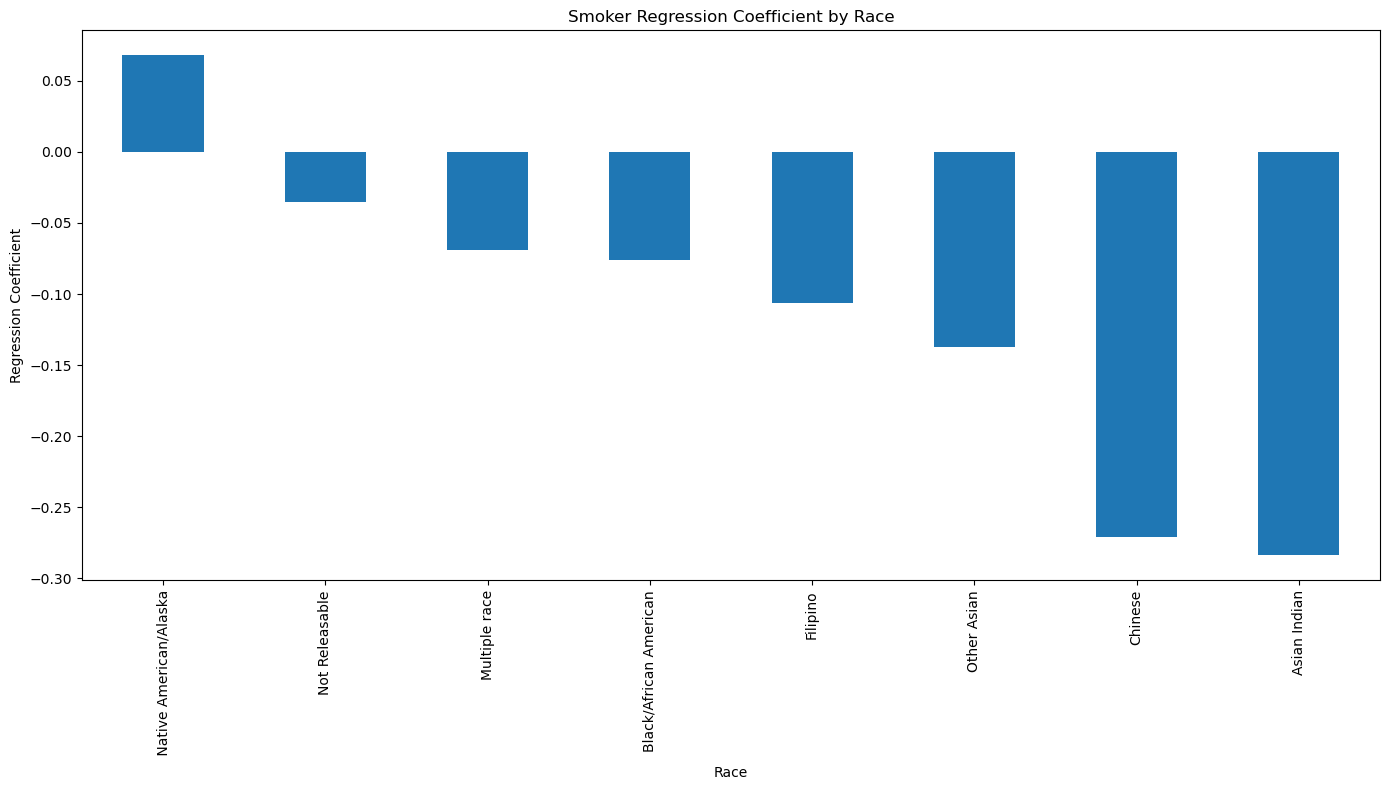

In [16]:
df_dia_reg = pd.DataFrame(dict_diabetes).T.round(3)
df_dia_reg.index = ['Asian Indian', 'Black/African American', 'Chinese', 'Filipino',
       ' Native American/Alaska','Multiple race', 'Other Asian', 'Not Releasable']
df_dia_reg.sort_values(0, ascending=False, inplace=True)

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', #'#bcbd22', '#17becf'
         ]


df_dia_reg.plot(kind='bar',legend=False, figsize=(14, 8), color=colors)
plt.title('Smoker Regression Coefficient by Race')
plt.xlabel('Race')
plt.ylabel('Regression Coefficient')
# plt.ylim(-0.01, 0.13)
# plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

## hypertension

In [18]:
df_linear = df_clean[['non_hispanic_race', 'hypertension']]

# One-hot encode the race column (create columns for each race with 0 or 1 values)
df_linear = pd.get_dummies(df_linear, columns=['non_hispanic_race'], #drop_first=True
                          )
df_linear.drop(columns=['non_hispanic_race_White'], inplace=True)
# Define the independent (predictor) variables: race columns
X = df_linear.filter(like='non_hispanic_race_')  # Select all the race dummy variables

# Define the dependent variable (target): diabetes (encoded as 0 = No, 1 = Yes)
y = df_linear['hypertension'].apply(lambda x: 1 if x == 'YES' else 0)

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Get the intercept and coefficients
intercept = model.intercept_
coefficients = model.coef_

dict_diabetes = {}

# Output the coefficients for each race
print(f"Intercept:{intercept: .4f}")
for race, coef in zip(X.columns, coefficients):
    print(f"Coefficient for {race}: {coef:.2f}")

    dict_diabetes[race] = [coef]

Intercept: 0.3489
Coefficient for non_hispanic_race_Asian Indian: -0.18
Coefficient for non_hispanic_race_Black/African American: 0.10
Coefficient for non_hispanic_race_Chinese: -0.12
Coefficient for non_hispanic_race_Filipino: 0.04
Coefficient for non_hispanic_race_Indian (American), Alaska Native: -0.02
Coefficient for non_hispanic_race_Multiple race, no primary race selected: -0.11
Coefficient for non_hispanic_race_Other Asian: -0.06
Coefficient for non_hispanic_race_Primary race not releasable: -0.03


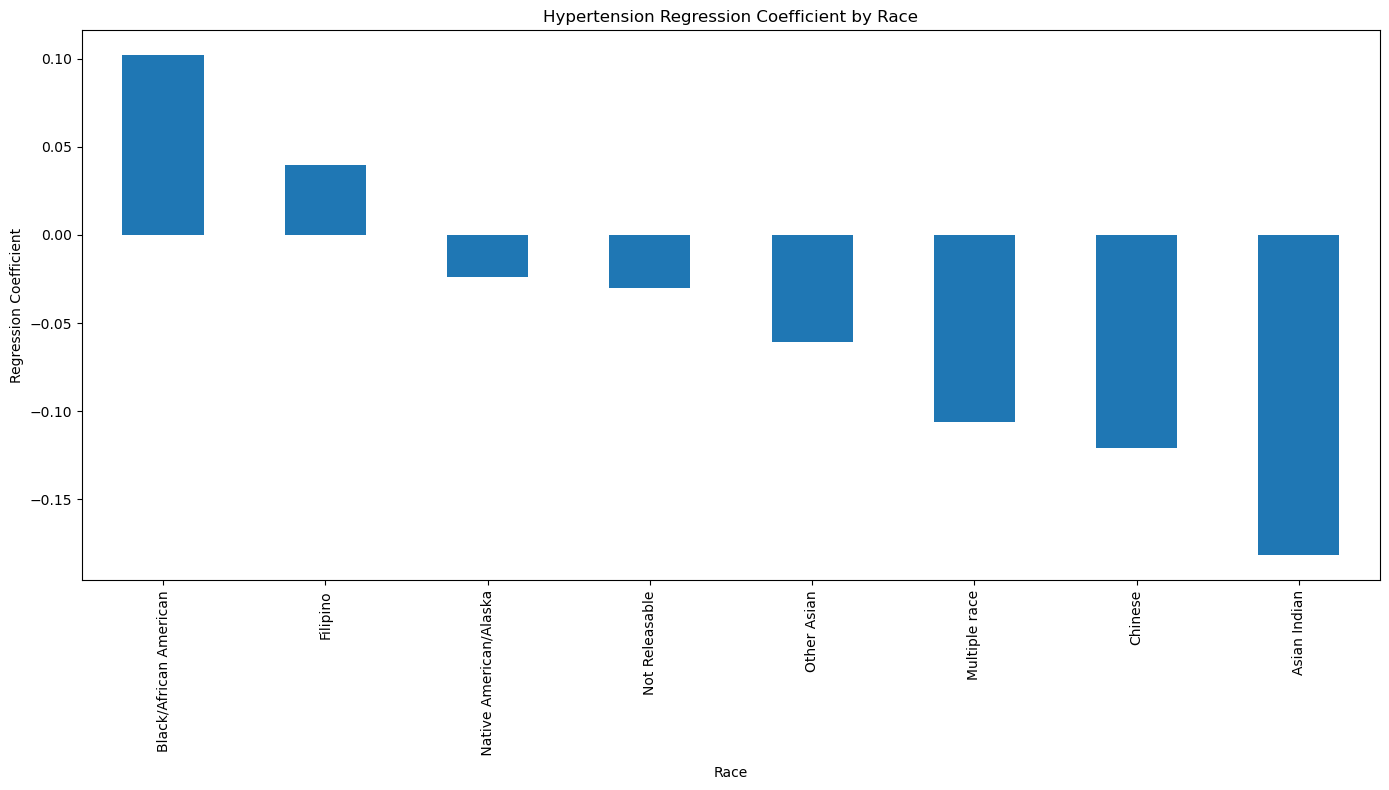

In [19]:
df_dia_reg = pd.DataFrame(dict_diabetes).T.round(3)
df_dia_reg.index = ['Asian Indian', 'Black/African American', 'Chinese', 'Filipino',
       ' Native American/Alaska','Multiple race', 'Other Asian', 'Not Releasable']
df_dia_reg.sort_values(0, ascending=False, inplace=True)

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', #'#bcbd22', '#17becf'
         ]


df_dia_reg.plot(kind='bar',legend=False, figsize=(14, 8), color=colors)
plt.title('Hypertension Regression Coefficient by Race')
plt.xlabel('Race')
plt.ylabel('Regression Coefficient')
# plt.ylim(-0.01, 0.13)
# plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

African Americans have a higher risk of hypertension due to a combination of genetic factors that may make them more sensitive to salt, higher rates of obesity, potential chronic stress related to systemic racism, and socioeconomic disadvantages which can contribute to poorer dietary habits and less access to healthcare, all leading to increased blood pressure levels

# Data Cleaning

In [22]:
from sklearn.impute import SimpleImputer, MissingIndicator
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.model_selection import cross_val_score,train_test_split

from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LinearRegression, Lasso, LogisticRegression, LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score

In [174]:
numeric_cols     = ['age', 'weight', 'height', 'years_on_job', #'bmi',
                   ]

categorical_cols = ['smoker', 'sex', #'class_of_worker', 'ever_worked', 'more_than_one_job', 
                    'coronary_heart_disease', 'had_high_cholesterol',
                    'family_history_diabetes', 'hypertension', 'heart_condition', 'cancer', 
                    'kidney_condition', 'liver_condition', 
                    # 'cant_afford_meds', 'skipped_meds', 'primary_care', 'non_hispanic_race', 'hispanic','non_hispanic_race',
                   ]

target_col       = ['diabetes']

X = df_clean.dropna()[numeric_cols+categorical_cols]
y = df_clean.dropna()[target_col].replace({'YES':1, 'NO':0})

In [176]:
scaler = MinMaxScaler()
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

In [178]:
X_dummies = pd.get_dummies(X, columns=categorical_cols, dtype=float)
X_dummies.head()

,age,weight,height,years_on_job,smoker_NO,smoker_YES,sex_FEMALE,sex_MALE,coronary_heart_disease_NO,coronary_heart_disease_YES,...,hypertension_NO,hypertension_YES,heart_condition_NO,heart_condition_YES,cancer_NO,cancer_YES,kidney_condition_NO,kidney_condition_YES,liver_condition_NO,liver_condition_YES
0,0.075758,0.125628,0.411765,0.057143,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,0.863636,0.452261,0.647059,0.714286,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,0.257576,0.628141,0.294118,0.057143,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,0.242424,0.703518,0.352941,0.028571,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,0.015152,0.015075,0.176471,0.000000,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [180]:
X_train, X_test, y_train, y_test = train_test_split(X_dummies, y, test_size=0.2, stratify=y)

# Logistic Regression

In [183]:
model = LogisticRegression(n_jobs=-1)
model.fit(X_train, y_train)

LogisticRegression(n_jobs=-1)

In [184]:
y_pred = model.predict(X_test)
print("---Development Set Results---")
print("Accuracy: {:.4f}".format(accuracy_score(y_test, y_pred)))
print("F1 Score: {:.4f}".format(f1_score(y_test, y_pred)))

print(classification_report(y_test, y_pred))

---Development Set Results---
Accuracy: 0.8932
F1 Score: 0.2428
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      5725
           1       0.52      0.16      0.24       696

    accuracy                           0.89      6421
   macro avg       0.71      0.57      0.59      6421
weighted avg       0.86      0.89      0.87      6421



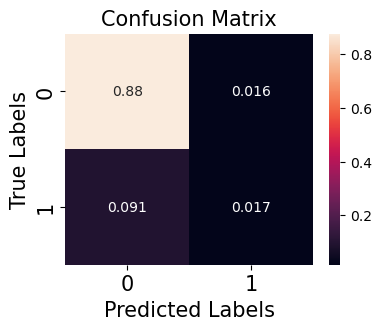

In [185]:
matrix = confusion_matrix(y_test,y_pred, normalize='all')
plt.figure(figsize=(4, 3))
ax= plt.subplot()
sns.heatmap(matrix, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted Labels', size=15)
ax.set_ylabel('True Labels', size=15)
ax.set_title('Confusion Matrix', size=15)
ax.xaxis.set_ticklabels([0,1], size=15)
ax.yaxis.set_ticklabels([0,1], size=15);

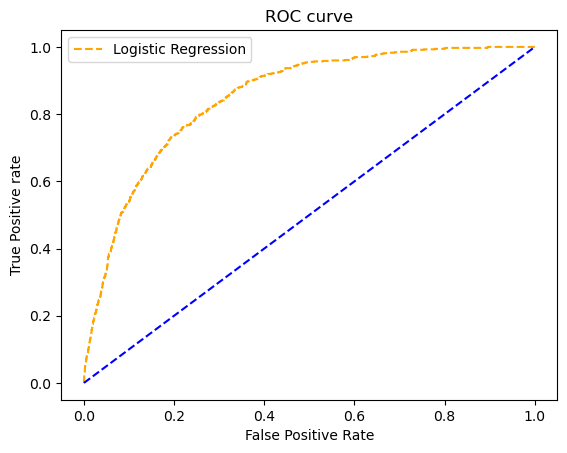

AUC score: 0.8502


In [186]:
from sklearn.metrics import roc_curve, roc_auc_score

pred_prob1 = model.predict_proba(X_test)

auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])

fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show();

print('AUC score:',round(auc_score1, 4))

# Random Forrest

In [188]:
model = RandomForestClassifier(n_jobs=-1)
model.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1)

In [189]:
y_pred = model.predict(X_test)
print("---Test Set Results---")
print("Accuracy: {:.4f}".format(accuracy_score(y_test, y_pred)))
print("F1 Score: {:.4f}".format(f1_score(y_test, y_pred)))

print(classification_report(y_test, y_pred))

---Test Set Results---
Accuracy: 0.8890
F1 Score: 0.2747
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      5725
           1       0.47      0.19      0.27       696

    accuracy                           0.89      6421
   macro avg       0.69      0.58      0.61      6421
weighted avg       0.86      0.89      0.87      6421



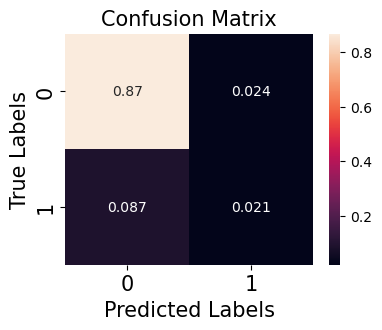

In [190]:
matrix = confusion_matrix(y_test,y_pred, normalize='all')
plt.figure(figsize=(4, 3))
ax= plt.subplot()
sns.heatmap(matrix, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted Labels', size=15)
ax.set_ylabel('True Labels', size=15)
ax.set_title('Confusion Matrix', size=15)
ax.xaxis.set_ticklabels([0,1], size=15)
ax.yaxis.set_ticklabels([0,1], size=15);

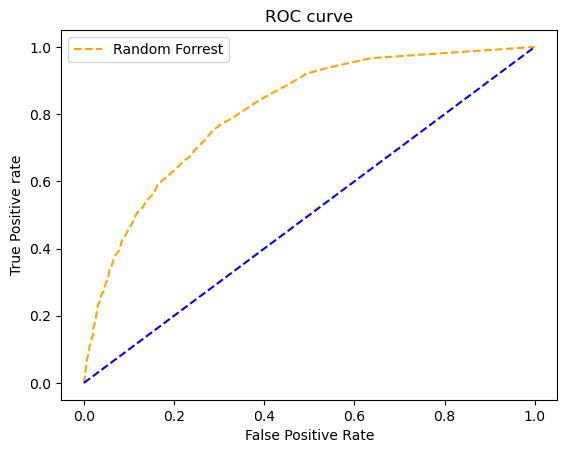

AUC score: 0.8098


In [192]:
from sklearn.metrics import roc_curve, roc_auc_score

pred_prob1 = model.predict_proba(X_test)

auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])

fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Random Forrest')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show();

print('AUC score:',round(auc_score1, 4))

In [196]:
importances = model.feature_importances_

dict_imp = dict(zip(X_train.columns, importances))

df_importance =  pd.DataFrame.from_dict(dict_imp, orient='index').sort_values(0)

df_importance[df_importance[0]>0.01].round(3)

,0
smoker_YES,0.012
smoker_NO,0.013
had_high_cholesterol_YES,0.022
had_high_cholesterol_NO,0.024
hypertension_NO,0.025
family_history_diabetes_NO,0.028
family_history_diabetes_YES,0.029
hypertension_YES,0.033
height,0.134
years_on_job,0.163


In [37]:
# from sklearn.model_selection import StratifiedKFold

# # Initialize StratifiedKFold
# skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# # Initialize lists to store results
# accuracy_scores = []
# f1_scores = []

# # Loop through the splits
# for train_index, test_index in skf.split(X_dummies, y):
#     # Split the data into train and test sets
#     X_train, X_test = X_dummies.iloc[train_index], X_dummies.iloc[test_index]
#     y_train, y_test = y.iloc[train_index], y.iloc[test_index]

#     # Train a logistic regression model
#     model = RandomForestClassifier(n_jobs=-1)
#     model.fit(X_train, y_train)

#     # Make predictions and evaluate
#     y_pred = model.predict(X_test)
#     acc = accuracy_score(y_test, y_pred)
#     f1 = f1_score(y_test, y_pred)

#     f1_scores.append(f1)
#     accuracy_scores.append(acc)

#     print(f"F1 Score: {f1:.4f}")

#     print(f"Fold accuracy: {acc:.4f}")

# SMOTE

In [39]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

In [40]:
# X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2)

# Logistic Regression

In [42]:
model = LogisticRegression(n_jobs=-1)
model.fit(X_res, y_res)

LogisticRegression(n_jobs=-1)

In [43]:
y_pred = model.predict(X_test)
print("---Development Set Results---")
print("Accuracy: {:.4f}".format(accuracy_score(y_test, y_pred)))
print("F1 Score: {:.4f}".format(f1_score(y_test, y_pred)))

print(classification_report(y_test, y_pred))

---Development Set Results---
Accuracy: 0.7631
F1 Score: 0.4184
              precision    recall  f1-score   support

           0       0.97      0.76      0.85      5725
           1       0.29      0.79      0.42       696

    accuracy                           0.76      6421
   macro avg       0.63      0.77      0.63      6421
weighted avg       0.89      0.76      0.80      6421



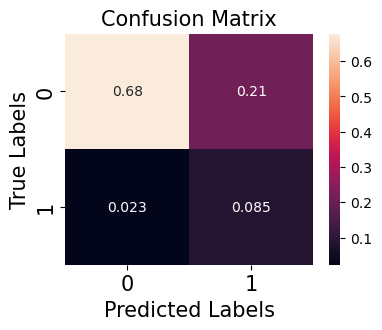

In [44]:
matrix = confusion_matrix(y_test,y_pred, normalize='all')
plt.figure(figsize=(4, 3))
ax= plt.subplot()
sns.heatmap(matrix, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted Labels', size=15)
ax.set_ylabel('True Labels', size=15)
ax.set_title('Confusion Matrix', size=15)
ax.xaxis.set_ticklabels([0,1], size=15)
ax.yaxis.set_ticklabels([0,1], size=15);

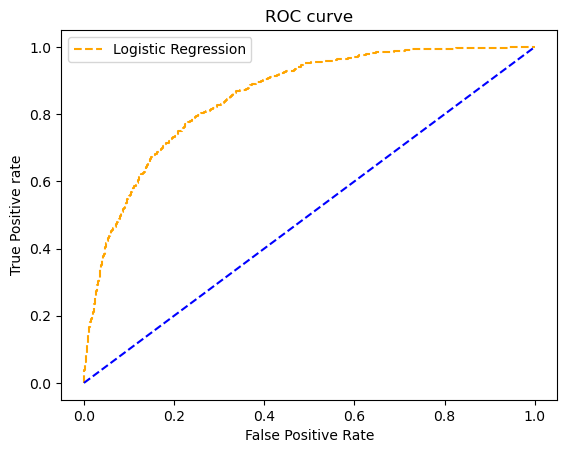

AUC score: 0.8531


In [45]:
from sklearn.metrics import roc_curve, roc_auc_score

pred_prob1 = model.predict_proba(X_test)

auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])

fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show();

print('AUC score:',round(auc_score1, 4))

# Random Forrest

In [47]:
model = RandomForestClassifier(n_jobs=-1)
model.fit(X_res, y_res)

RandomForestClassifier(n_jobs=-1)

In [48]:
y_pred = model.predict(X_test)
print("---Test Set Results---")
print("Accuracy: {:.4f}".format(accuracy_score(y_test, y_pred)))
print("F1 Score: {:.4f}".format(f1_score(y_test, y_pred)))

print(classification_report(y_test, y_pred))

---Test Set Results---
Accuracy: 0.8545
F1 Score: 0.3927
              precision    recall  f1-score   support

           0       0.93      0.91      0.92      5725
           1       0.36      0.43      0.39       696

    accuracy                           0.85      6421
   macro avg       0.64      0.67      0.66      6421
weighted avg       0.87      0.85      0.86      6421



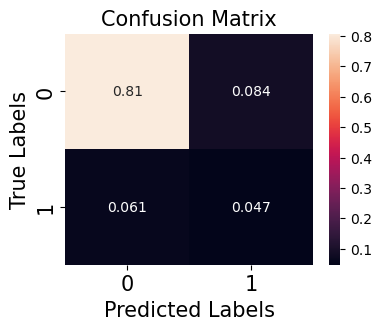

In [49]:
matrix = confusion_matrix(y_test,y_pred, normalize='all')
plt.figure(figsize=(4, 3))
ax= plt.subplot()
sns.heatmap(matrix, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted Labels', size=15)
ax.set_ylabel('True Labels', size=15)
ax.set_title('Confusion Matrix', size=15)
ax.xaxis.set_ticklabels([0,1], size=15)
ax.yaxis.set_ticklabels([0,1], size=15);

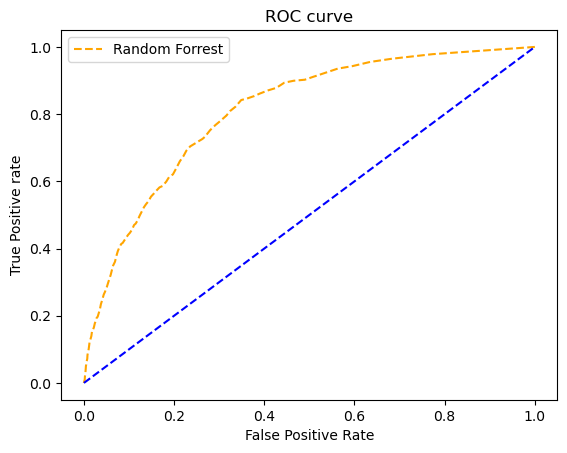

AUC score: 0.8095


In [50]:
from sklearn.metrics import roc_curve, roc_auc_score

pred_prob1 = model.predict_proba(X_test)

auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])

fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Random Forrest')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show();

print('AUC score:',round(auc_score1, 4))

In [51]:
importances = model.feature_importances_

dict_imp = dict(zip(X_train.columns, importances))

df_importance =  pd.DataFrame.from_dict(dict_imp, orient='index').sort_values(0)

df_importance[df_importance[0]>0.01].round(3)

,0
smoker_NO,0.010
had_high_cholesterol_NO,0.034
family_history_diabetes_NO,0.037
had_high_cholesterol_YES,0.038
family_history_diabetes_YES,0.049
hypertension_NO,0.055
hypertension_YES,0.073
height,0.135
years_on_job,0.137
weight,0.150


# Only Important Attributes

In [220]:
numeric_cols     = ['age', 'weight', 'height', 'years_on_job']

categorical_cols = ['smoker', 'had_high_cholesterol', 'family_history_diabetes', 'hypertension', ]

target_col       = ['diabetes']

X = df_clean.dropna()[numeric_cols+categorical_cols]
y = df_clean.dropna()[target_col].replace({'YES':1, 'NO':0})

In [222]:
scaler = MinMaxScaler()
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

In [224]:
X_dummies = pd.get_dummies(X, columns=categorical_cols, dtype=float)
X_dummies.head()

,age,weight,height,years_on_job,smoker_NO,smoker_YES,had_high_cholesterol_NO,had_high_cholesterol_YES,family_history_diabetes_NO,family_history_diabetes_YES,hypertension_NO,hypertension_YES
0,0.075758,0.125628,0.411765,0.057143,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,0.863636,0.452261,0.647059,0.714286,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,0.257576,0.628141,0.294118,0.057143,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,0.242424,0.703518,0.352941,0.028571,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
4,0.015152,0.015075,0.176471,0.000000,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


In [226]:
X_train, X_test, y_train, y_test = train_test_split(X_dummies, y, test_size=0.2, stratify=y)

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

In [227]:
model = RandomForestClassifier(n_jobs=-1)
model.fit(X_res, y_res)

RandomForestClassifier(n_jobs=-1)

In [229]:
y_pred = model.predict(X_test)
print("---Development Set Results---")
print("Accuracy: {:.4f}".format(accuracy_score(y_test, y_pred)))
print("F1 Score: {:.4f}".format(f1_score(y_test, y_pred)))

print(classification_report(y_test, y_pred))

---Development Set Results---
Accuracy: 0.8541
F1 Score: 0.3967
              precision    recall  f1-score   support

           0       0.93      0.90      0.92      5725
           1       0.36      0.44      0.40       696

    accuracy                           0.85      6421
   macro avg       0.64      0.67      0.66      6421
weighted avg       0.87      0.85      0.86      6421



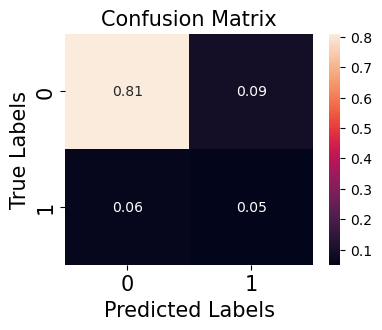

In [246]:
matrix = confusion_matrix(y_test,y_pred, normalize='all').round(2)
plt.figure(figsize=(4, 3))
ax= plt.subplot()
sns.heatmap(matrix, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted Labels', size=15)
ax.set_ylabel('True Labels', size=15)
ax.set_title('Confusion Matrix', size=15)
ax.xaxis.set_ticklabels([0,1], size=15)
ax.yaxis.set_ticklabels([0,1], size=15);